In [1]:
import numpy as np
import pandas as pd
import statsrat as sr
from gradual_extn import reinstatement
from extn_rw_models import *
from statsrat.rw.predef import CompAct, drva
from plotnine import *

In [2]:
#model = refined
#model = CompAct
#model = tdrva # It looks like this can do it, but it could still use some tinkering.
#model = tdrva_cfg2
#model = tdrva_decay_cfg2
model = revised_CompAct
save_plots = False
perform_oat = False
print(model.pars)

par_vals = {'refined': [0.001, 0.2, 1.5, 5.0],
            'CompAct': [0.2, 1.0, 10.0, 5.0],
            'drva': [0.1, 0.2, 5.0],
            'tdrva': [0.25, 0.8, 1.0, 1.5, 5],
            'tdrva_cfg2': [0.25, 0.8, 1.0, 1.5, 5],
            'tdrva_decay_cfg2': [0.001, 0.25, 0.8, 1.0, 1.5, 5],
            'revised_CompAct': [0.01, 2.0, 0.2, 10.0, 0.9, 5]}

            min   max  default
drate       0.0   0.5     0.25
lrate_atn   0.0   2.0     0.20
lrate_min   0.0   0.5     0.10
metric      0.1  10.0     2.00
power       0.0   2.0     0.50
resp_scale  0.0  10.0     1.00


In [3]:
if perform_oat:
    oat_result = sr.perform_oat(experiment = reinstatement,
                                model = model,
                                oat = 'grd_vs_std',
                                minimize = False,
                                n = 1)
    print(np.round(oat_result[0], 4))
    print(np.round(oat_result[1], 4))

In [4]:
print('gradual extinction: reinstatement \n')

trials = reinstatement.make_trials('gradual')
ds_grd = model.simulate(trials, par_vals[model.name])

trials = reinstatement.make_trials('standard')
ds_std = model.simulate(trials, par_vals[model.name])

trials = reinstatement.make_trials('gradual_reverse')
ds_rev = model.simulate(trials, par_vals[model.name])

print('\ngradual vs. standard')
print(reinstatement.oats['grd_vs_std'].compute_total({'gradual': ds_grd, 'standard': ds_std}))
print(reinstatement.oats['grd_vs_std'].mean_resp({'gradual': ds_grd, 'standard': ds_std}))
print('\ngradual vs. gradual reverse')
print(reinstatement.oats['grd_vs_rev'].compute_total({'gradual': ds_grd, 'gradual_reverse': ds_rev}))
print(reinstatement.oats['grd_vs_rev'].mean_resp({'gradual': ds_grd, 'gradual_reverse': ds_rev}))

gradual extinction: reinstatement 


gradual vs. standard
0.10987817211904383
   schedule     trial_name u_name  mean_resp
0  standard  cs -> nothing     us   0.629246
0   gradual  cs -> nothing     us   0.519367

gradual vs. gradual reverse
0.02695773380886224
          schedule     trial_name u_name  mean_resp
0  gradual_reverse  cs -> nothing     us   0.546325
0          gradual  cs -> nothing     us   0.519367


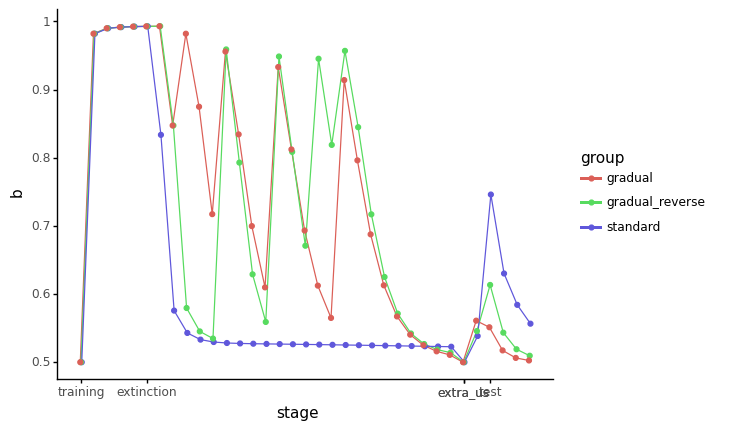

In [5]:
plot_b = sr.multi_plot(ds_list = [ds_grd, ds_std, ds_rev],
                       var = 'b',
                       rename_coords = {'schedule': 'group'},
                       only_main = True,
                       draw_points = True)
                       #sel = 2*[{'t': ds_grd['stage_name'].isin(['training', 'early_extinction', 'late_extinction', 'test'])}, None])
plot_b += theme_classic()
plot_b.draw()
if save_plots:
    plot_b.save(filename = 'plots/rw_gradual_reinstatement_b_' + model.name)

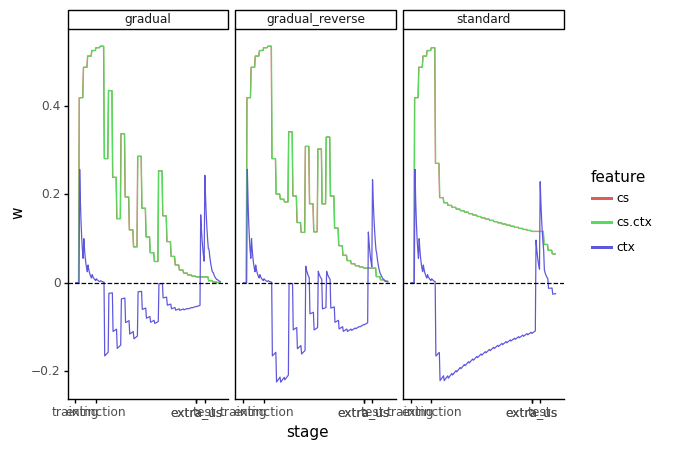

In [6]:
plot_w = sr.multi_plot(ds_list = [ds_grd, ds_std, ds_rev],
                       var = 'w',
                       schedule_facet = True,
                       rename_coords = {'schedule': 'group', 'f_name': 'feature'})
plot_w += geom_hline(yintercept = 0, linetype = "dashed")
plot_w += theme_classic()
plot_w.draw()
if save_plots:
    plot_w.save(filename = 'plots/rw_gradual_reinstatement_w_' + model.name)

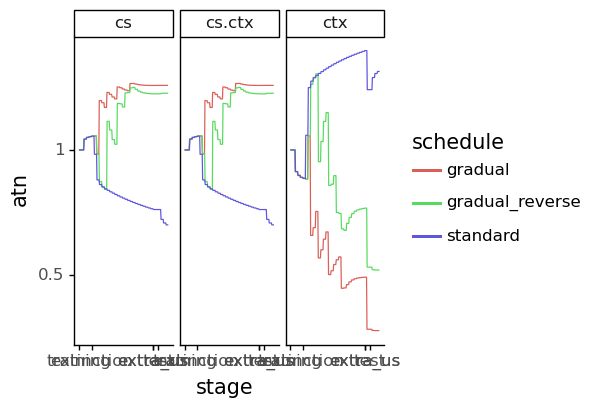

In [7]:
if 'atn' in ds_grd.keys():
    sr.multi_plot([ds_grd, ds_std, ds_rev], 'atn').draw()